Система уравнений

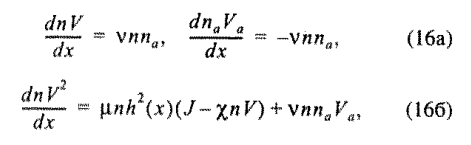

# Метод Эйлера

Импорт необходимыых библиотек

In [ ]:
import numpy as np
from scipy. integrate import odeint
import time
import matplotlib.pyplot as plt
from sympy.solvers.ode.systems import dsolve_system
from sympy import *
#linestyle = '--'

Определение стартовых параметров

In [ ]:
U0 = 200
mu = 1/6*U0
nu = 20
Va = 0.1
Rch = 8*1e4
hi = 7*1e4/U0
l = 1e-2
r=1e-3
h0 = 0.1
r0 = 1/15*(8*h0**2+4*h0+3)

In [ ]:
ans = 0
def s(n,V,x,ans):
  ans+=(1-7.0*25/350)*(h0+(1-h0)*(x)**2)*n*V/(r+r0)
  return ans



In [ ]:
def E(x,i,n,V,na):
    return (1/6*350.0*n*(h0+(1-h0)*(x)**2)**2*(3-7.0*1e4/350/25*n*V)+nu*n*((nn1[0]*VV1[0]+Va-n*V))/Va)
def a(x,i,n,V,na):
  return (2*nu*V*n*((nn1[0]*VV1[0]+Va-n*V))/Va-E(x,i,n,V,na))/V
def b(x,i,n,V,na):
  return (E(x,i,n,V,na)-n*V*nu*((nn1[0]*VV1[0]+Va-n*V))/Va)/(n*V)

In [ ]:
def c(x,i,n,V,na):
  return -nu*n*na/Va

In [ ]:
j = 400
h = 0.1/2
m = int(1/h)
x1 = np.linspace(0,1,m)



nn1 = [0.0]*m
VV1 = [0.0]*m
na1 = [0.0]*m




nn1[0] = 0.01
VV1[0] = 1.0
na1[0] = 1.0



for i in range((m-1)):
  nn1[i+1] = nn1[i] + a(x1[i],j,nn1[i],VV1[i],na1[i])*h
  VV1[i+1] = VV1[i] + b(x1[i],j,nn1[i],VV1[i],na1[i])*h
  na1[i+1] = na1[i]+ c(x1[i],j,nn1[i],VV1[i],na1[i])*h

h = 0.1/4
m = int(1/h)
x2 = np.linspace(0,1,m)
nn2 = [0.0]*m
VV2 = [0.0]*m
na2 = [0.0]*m

nn2[0] = 0.01
VV2[0] = 1.0
na2[0] = 1.0


for i in range((m-1)):
  nn2[i+1] = nn2[i] + a(x2[i],j,nn2[i],VV2[i],na2[i])*h
  VV2[i+1] = VV2[i] + b(x2[i],j,nn2[i],VV2[i],na2[i])*h
  na2[i+1] = na2[i]++ c(x2[i],j,nn2[i],VV2[i],na2[i])*h

h = 0.1/100
m = int(1/h)
x3 = np.linspace(0,1,m)


nn3 = [0.0]*m
VV3 = [0.0]*m
na3 = [0.0]*m
nn3[0] = 0.01
VV3[0] = 1.0
na3[0] = 1.0
for i in range((m-1)):
  nn3[i+1] = nn3[i] + a(x3[i],j,nn3[i],VV3[i],na3[i])*h
  VV3[i+1] = VV3[i] + b(x3[i],j,nn3[i],VV3[i],na3[i])*h
  na3[i+1] = na3[i]++ c(x3[i],j,nn3[i],VV3[i],na3[i])*h

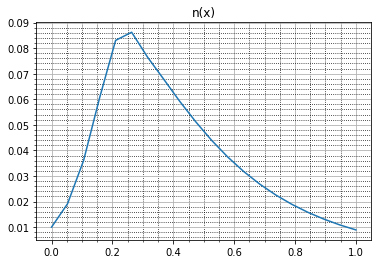

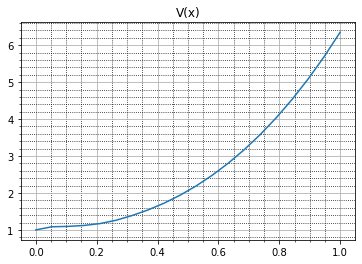

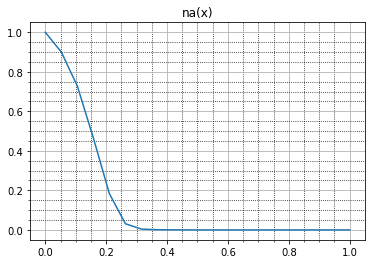

In [ ]:
#plt.figure(figsize=(20,10))
plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.figure(1)
plt.title("n(x)")

plt.plot(x1,nn1,label="n(x)")


# !!! Нарисуем график во втором окне
#plt.figure(figsize=(20,10))
plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.figure(2)

plt.title("V(x)")


plt.plot(x1,VV1, label="V(x)")


#plt.figure(figsize=(20,10))
plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.figure(3)


plt.plot(x1,na1, label="na(x)")

plt.title("na(x)")


#plt.figure(figsize=(20,10))
plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
# plt.figure(4)

# plt.title("J(x)")
# plt.grid(True)
# plt.grid(which='minor', 
#         color = 'k', 
#         linestyle = ':')
# J = [J[i] for i in range(len(J)) if J[i]!=0]
# plt.plot(range(300,500),J, label="J(x)")


# plt.legend()

# Метод Рунге-Кутта

Рассмотрим сначала стационарный случай

In [ ]:
import numpy as np
from scipy. integrate import odeint
import time
import matplotlib.pyplot as plt
from sympy.solvers.ode.systems import dsolve_system
from sympy import *

In [ ]:
h = 0.1/100
m = int(1/h)
x = np.linspace(0,1,m)

U0 = 350
mu = 1/6*U0
nu = 20
Va = 0.1
Rch = 8*1e4
hi = 7*1e4/U0/350/25
l = 1e-2
r=1e-3
h0 = 0.1
r0 = 1/15*(8*h0**2+4*h0+3)

nn = [0.0]*m
VV = [0.0]*m
na = [0.0]*m
nn[0] = 0.01
VV[0] = 1.0
na[0] = 1.0

In [ ]:
nx = []
vx = []
nax = []
def runge(p,g,h,x,Yi,Zi,i,U0,jjj,k):
  k11 = h*p(x,Yi,Zi,i,U0,jjj,k)
  k12 = h*g(x,Yi,Zi,i,U0,jjj,k)

  k22 = h*g(x+h/2,Yi+k11/2,Zi+k12/2,i,U0,jjj,k)
  k21 = h*p(x+h/2,Yi+k11/2,Zi+k12/2,i,U0,jjj,k)

  k31 = h*p(x+h/2,Yi+k21/2,Zi+k22/2,i,U0,jjj,k)
  k32 = h*g(x+h/2,Yi+k21/2,Zi+k22/2,i,U0,jjj,k)

  k41 = h*p(x+h,Yi+k31,Zi+k32,i,U0,jjj,k)
  k42 = h*g(x+h,Yi+k31,Zi+k32,i,U0,jjj,k)

  Yii = Yi + 1/6*(k11+2*k21+2*k31+k41)
  Zii = Zi + 1/6*(k12+2*k22+2*k32+k42)

  return Yii, Zii


def E(x,n,V,i,U0,jjj,k):
    return (1/6*U0*n*(h0+(1-h0)*(x)**2)**2*(jjj-7.0*1e4/U0/25*k/3*n*V)*2/jjj+nu*k/3*n*((nn[0]*VV[0]+Va-n*V))/Va)
def a(x,n,V,i,U0,jjj,k):
  return (2*nu*k/3*V*n*((nn[0]*VV[0]+Va-n*V))/Va-E(x,n,V,i,U0,jjj,k))/V**2
def b(x,n,V,i,U0,jjj,k):
  return (E(x,n,V,i,U0,jjj,k)-n*V*nu*k/3*((nn[0]*VV[0]+Va-n*V))/Va)/(V*n)
def c(x,i,n,V,na,jjj,k):
  return -nu*k/3*n*na/Va



x = np.linspace(0,1,m)
for j in range(2,50):
  for k in range(2,7):
    h = 0.1/100
    m = int(1/h)
    nn = [0.0]*m
    VV = [0.0]*m
    na = [0.0]*m
    nn[0] = 0.01
    VV[0] = 1.0
    na[0] = 1.0
    for i in range(0,m-1):
        t = runge(a,b,h,x[i],nn[i],VV[i],i,350,j,k)
        nn[i+1]=t[0]
        VV[i+1]=t[1]
        na[i+1] = na[i]+ c(x[i],400,nn[i],VV[i],na[i],j,k)*h
    nx.append(nn)
    vx.append(VV)
    nax.append(na)

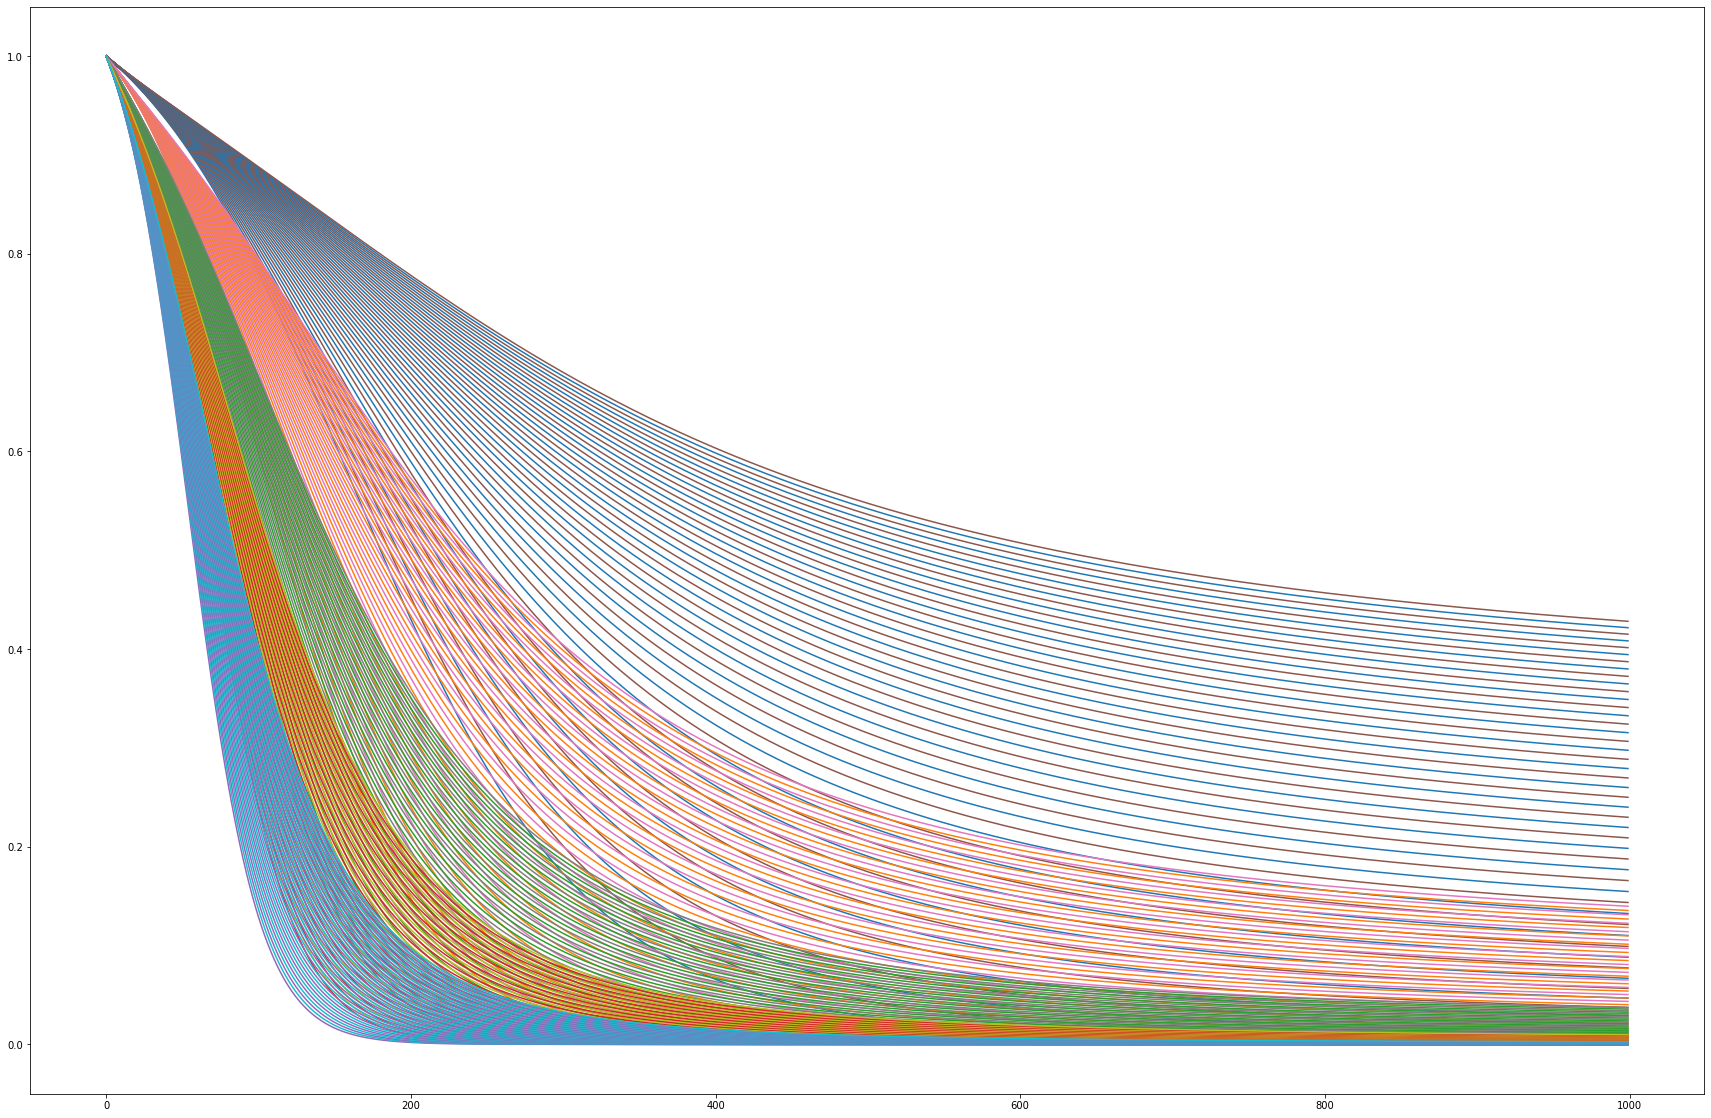

In [ ]:
plt.rcParams ['figure.figsize'] = [30, 20]
for i in range(len(vx)):
  plt.plot(nax[i])

#Визуализация

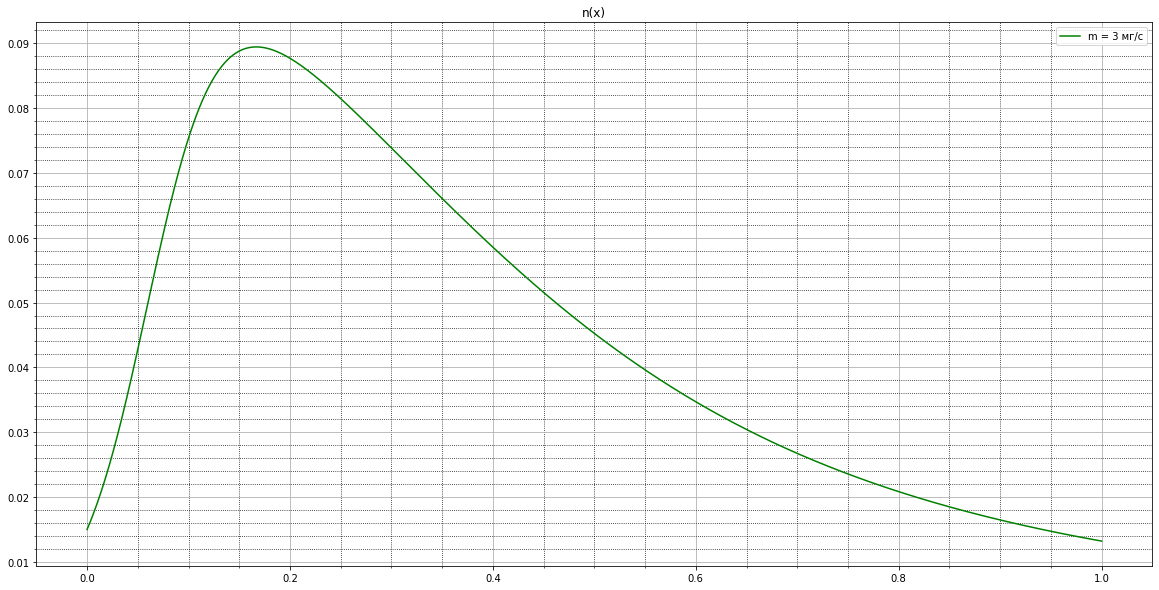

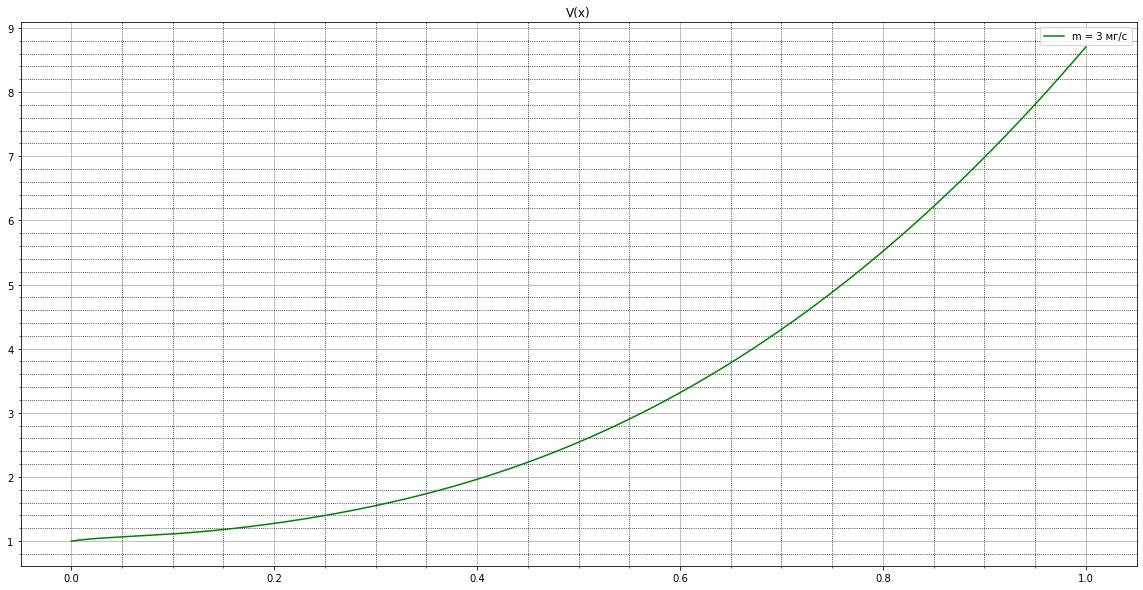

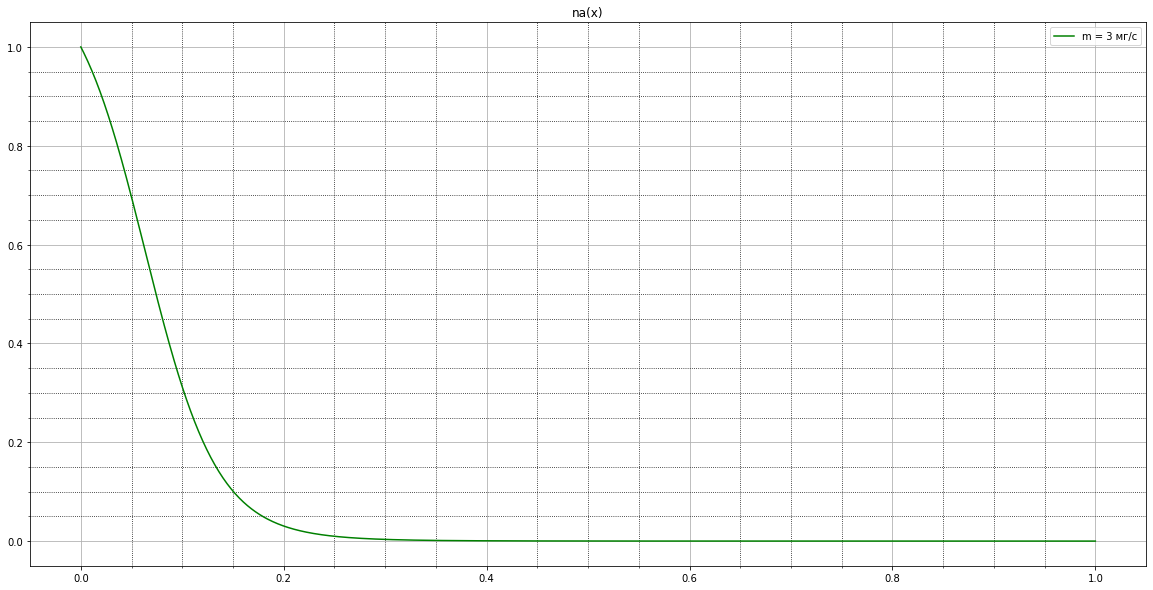

In [ ]:
#plt.figure(figsize=(20,10))
plt.rcParams ['figure.figsize'] = [20, 10]
plt.figure()
plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

plt.title("n(x)")

plt.plot(x,nn,label="n(x)",color = "green")


plt.legend(["m = 3 мг/c", "m = 2 мг/c", "m = 4 мг/c"])


# !!! Нарисуем график во втором окне
#plt.figure(figsize=(20,10))
plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.figure(2)

plt.title("V(x)")

plt.plot(x,VV, label="V(x)",color = "green")

plt.legend(["m = 3 мг/c", "m = 2 мг/c", "m = 4 мг/c"])


#plt.figure(figsize=(20,10))
plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.figure(3)


plt.plot(x,na, label="na(x)",color = "green")


plt.legend(["m = 3 мг/c", "m = 2 мг/c", "m = 4 мг/c"])
plt.title("na(x)")


#plt.figure(figsize=(20,10))
plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

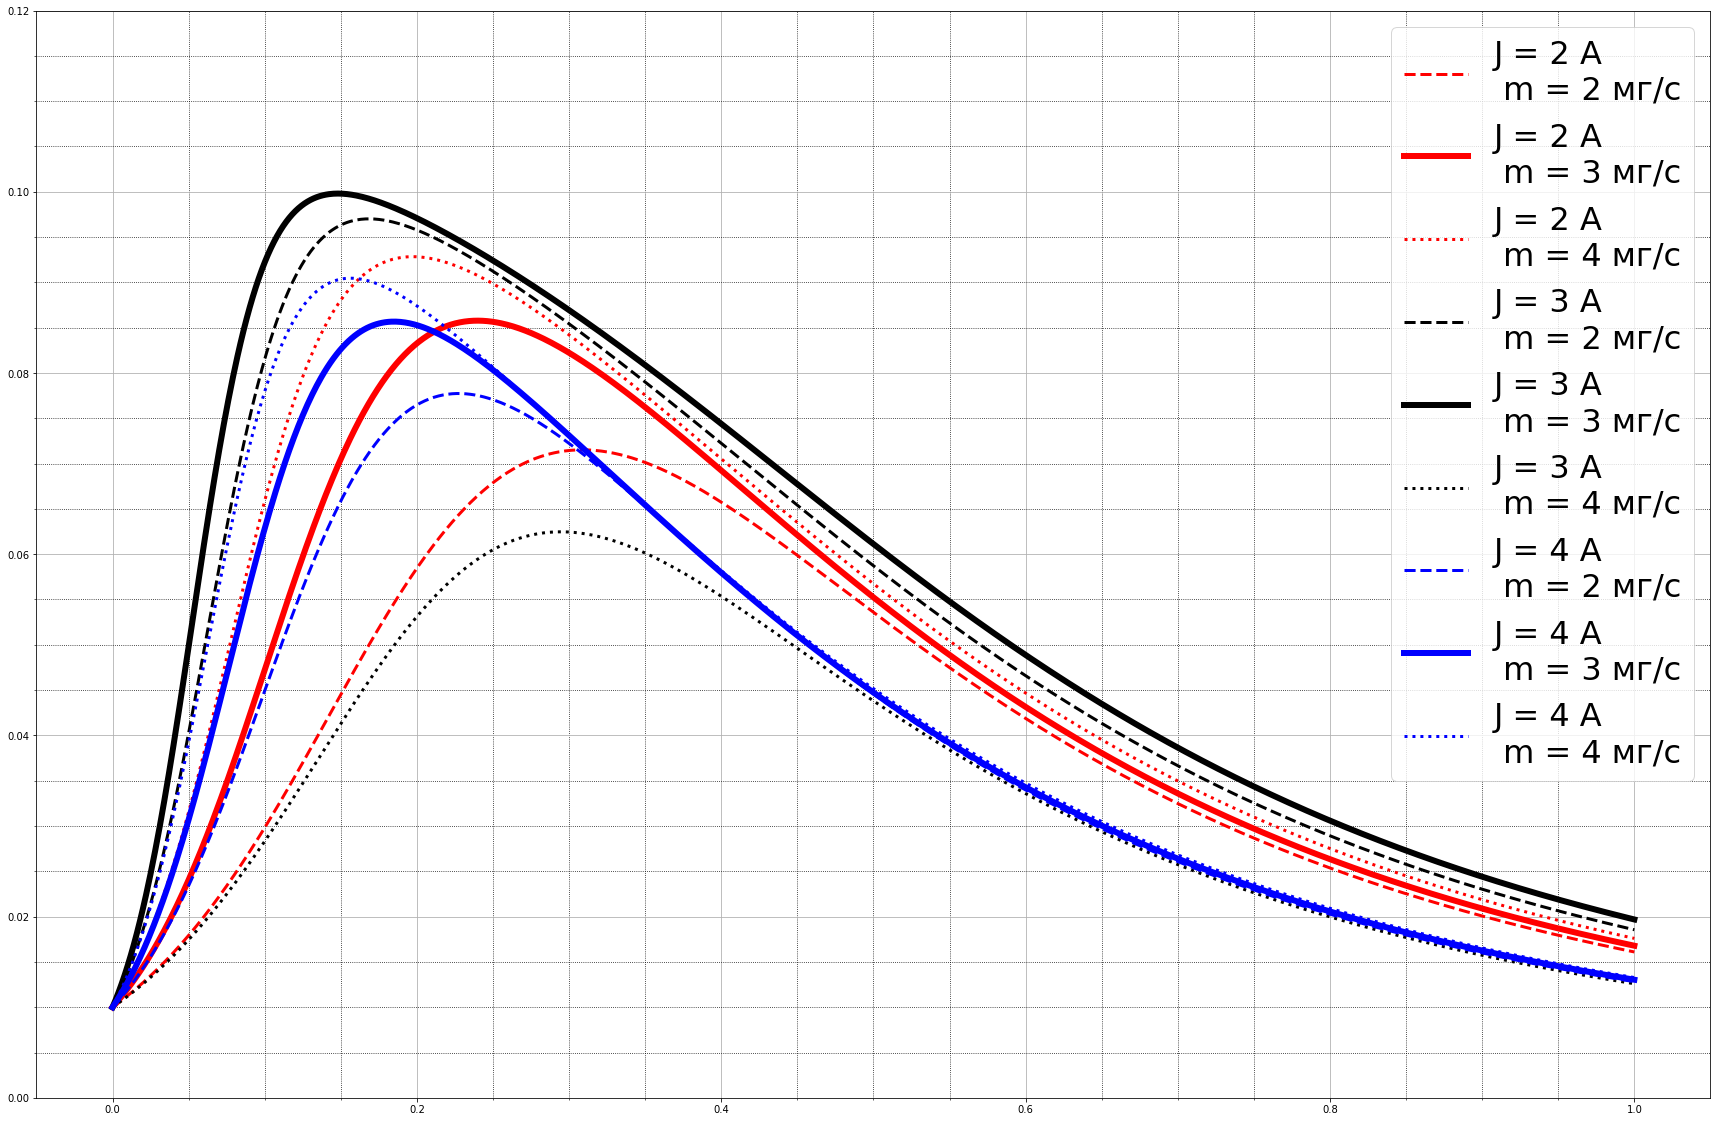

In [ ]:
plt.rcParams ['figure.figsize'] = [30, 20]



plt.ylim([0,0.12])

plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

  


plt.plot(x,nx[0],color = "red", linestyle =  "--",linewidth = 3)
plt.plot(x,nx[1],label="n(x)", color = "red",linewidth = 6)
plt.plot(x,nx[2],label="n(x)", color = "red", linestyle =  ":",linewidth = 3)

plt.plot(x,nx[3], label="V(x)",color = "black", linestyle =  "--",linewidth = 3)
plt.plot(x,nx[4],label="n(x)", color = "black",linewidth = 6)
plt.plot(x,nx[5],label="n(x)", color = "black", linestyle =  ":",linewidth = 3)


plt.plot(x,nx[6], label="V(x)",color = "blue", linestyle =  "--",linewidth = 3)
plt.plot(x,nx[7],label="n(x)", color = "blue",linewidth = 6)
plt.plot(x,nx[8],label="n(x)", color = "blue", linestyle =  ":",linewidth = 3)
plt.legend(['J = 2 A \n m = 2 мг/c','J = 2 A \n m = 3 мг/c',
            'J = 2 A \n m = 4 мг/c','J = 3 A \n m = 2 мг/c',
            'J = 3 A \n m = 3 мг/c','J = 3 A \n m = 4 мг/c',
            'J = 4 A \n m = 2 мг/c','J = 4 A \n m = 3 мг/c',
            'J = 4 A \n m = 4 мг/c'],fontsize = 32)
    



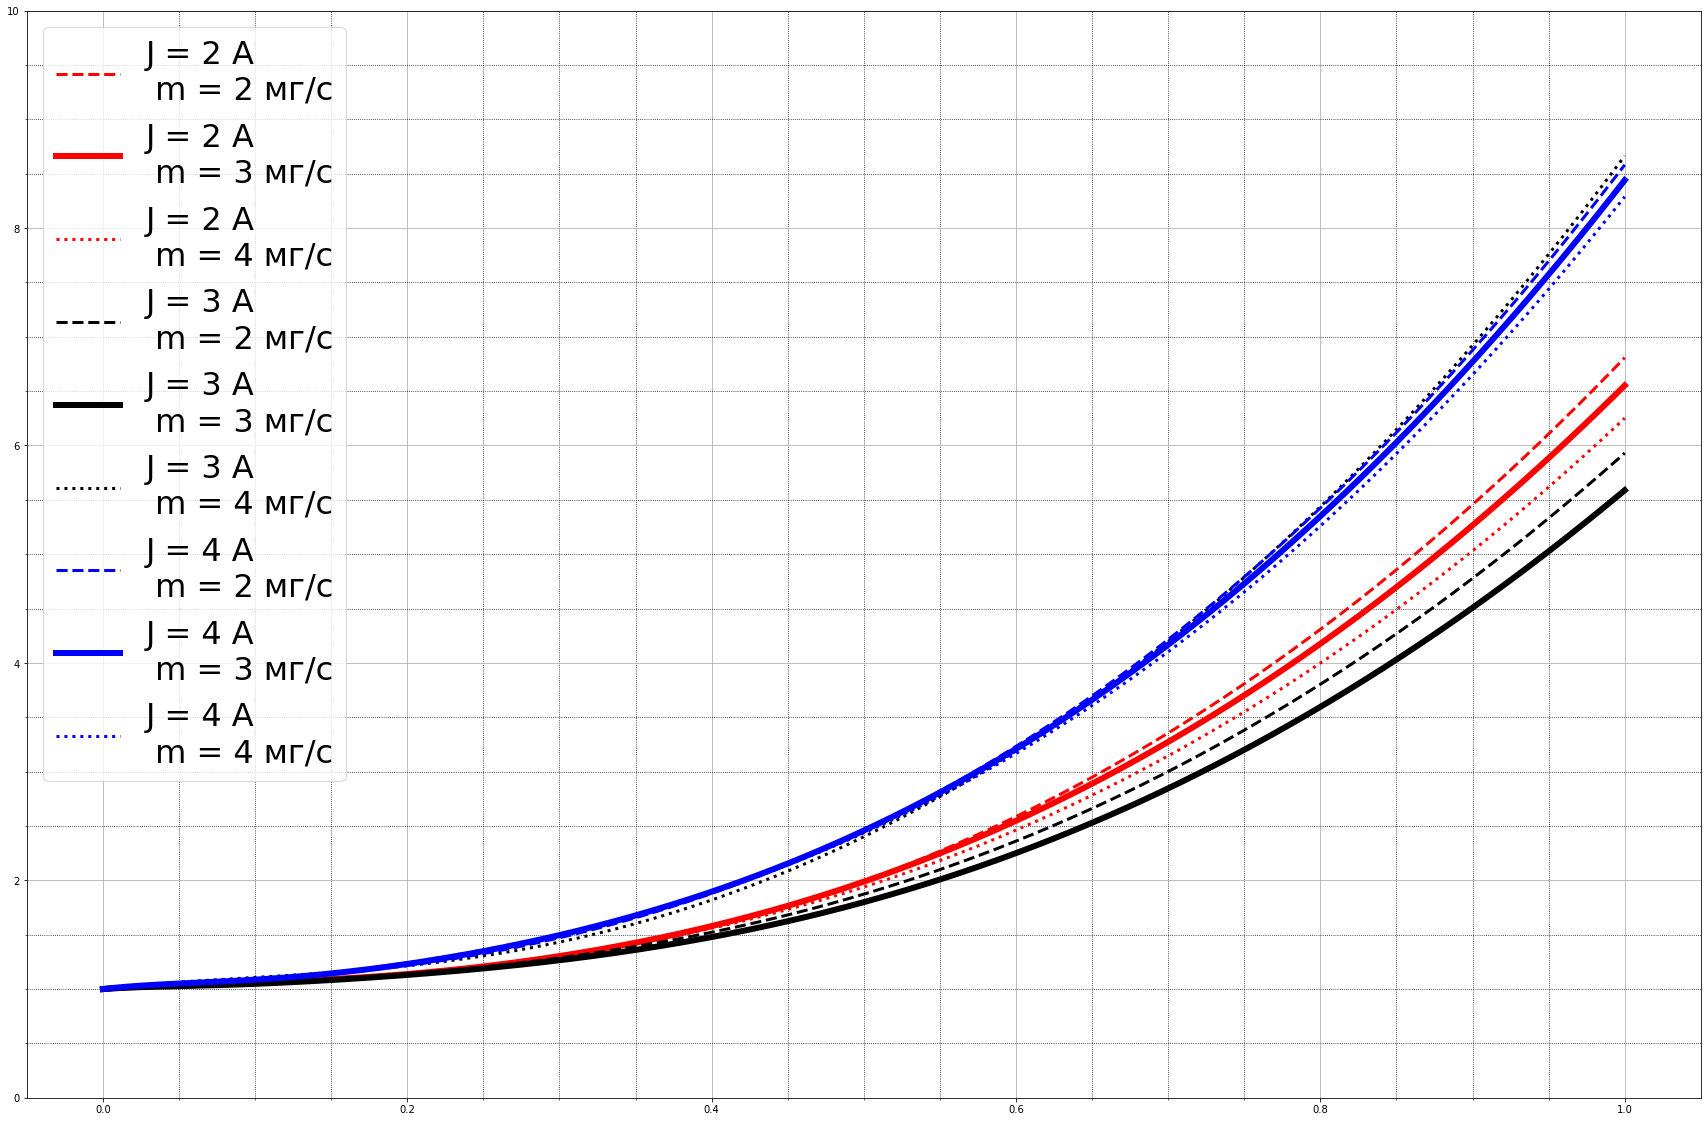

In [ ]:
plt.rcParams ['figure.figsize'] = [30, 20]



plt.ylim([0,10])

plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

  


plt.plot(x,vx[0],color = "red", linestyle =  "--",linewidth = 3)
plt.plot(x,vx[1],label="n(x)", color = "red",linewidth = 6)
plt.plot(x,vx[2],label="n(x)", color = "red", linestyle =  ":",linewidth = 3)

plt.plot(x,vx[3], label="V(x)",color = "black", linestyle =  "--",linewidth = 3)
plt.plot(x,vx[4],label="n(x)", color = "black",linewidth = 6)
plt.plot(x,vx[5],label="n(x)", color = "black", linestyle =  ":",linewidth = 3)


plt.plot(x,vx[6], label="V(x)",color = "blue", linestyle =  "--",linewidth = 3)
plt.plot(x,vx[7],label="n(x)", color = "blue",linewidth = 6)
plt.plot(x,vx[8],label="n(x)", color = "blue", linestyle =  ":",linewidth = 3)
plt.legend(['J = 2 A \n m = 2 мг/c','J = 2 A \n m = 3 мг/c',
            'J = 2 A \n m = 4 мг/c','J = 3 A \n m = 2 мг/c',
            'J = 3 A \n m = 3 мг/c','J = 3 A \n m = 4 мг/c',
            
            'J = 4 A \n m = 2 мг/c','J = 4 A \n m = 3 мг/c',
            'J = 4 A \n m = 4 мг/c'],fontsize = 32)
    



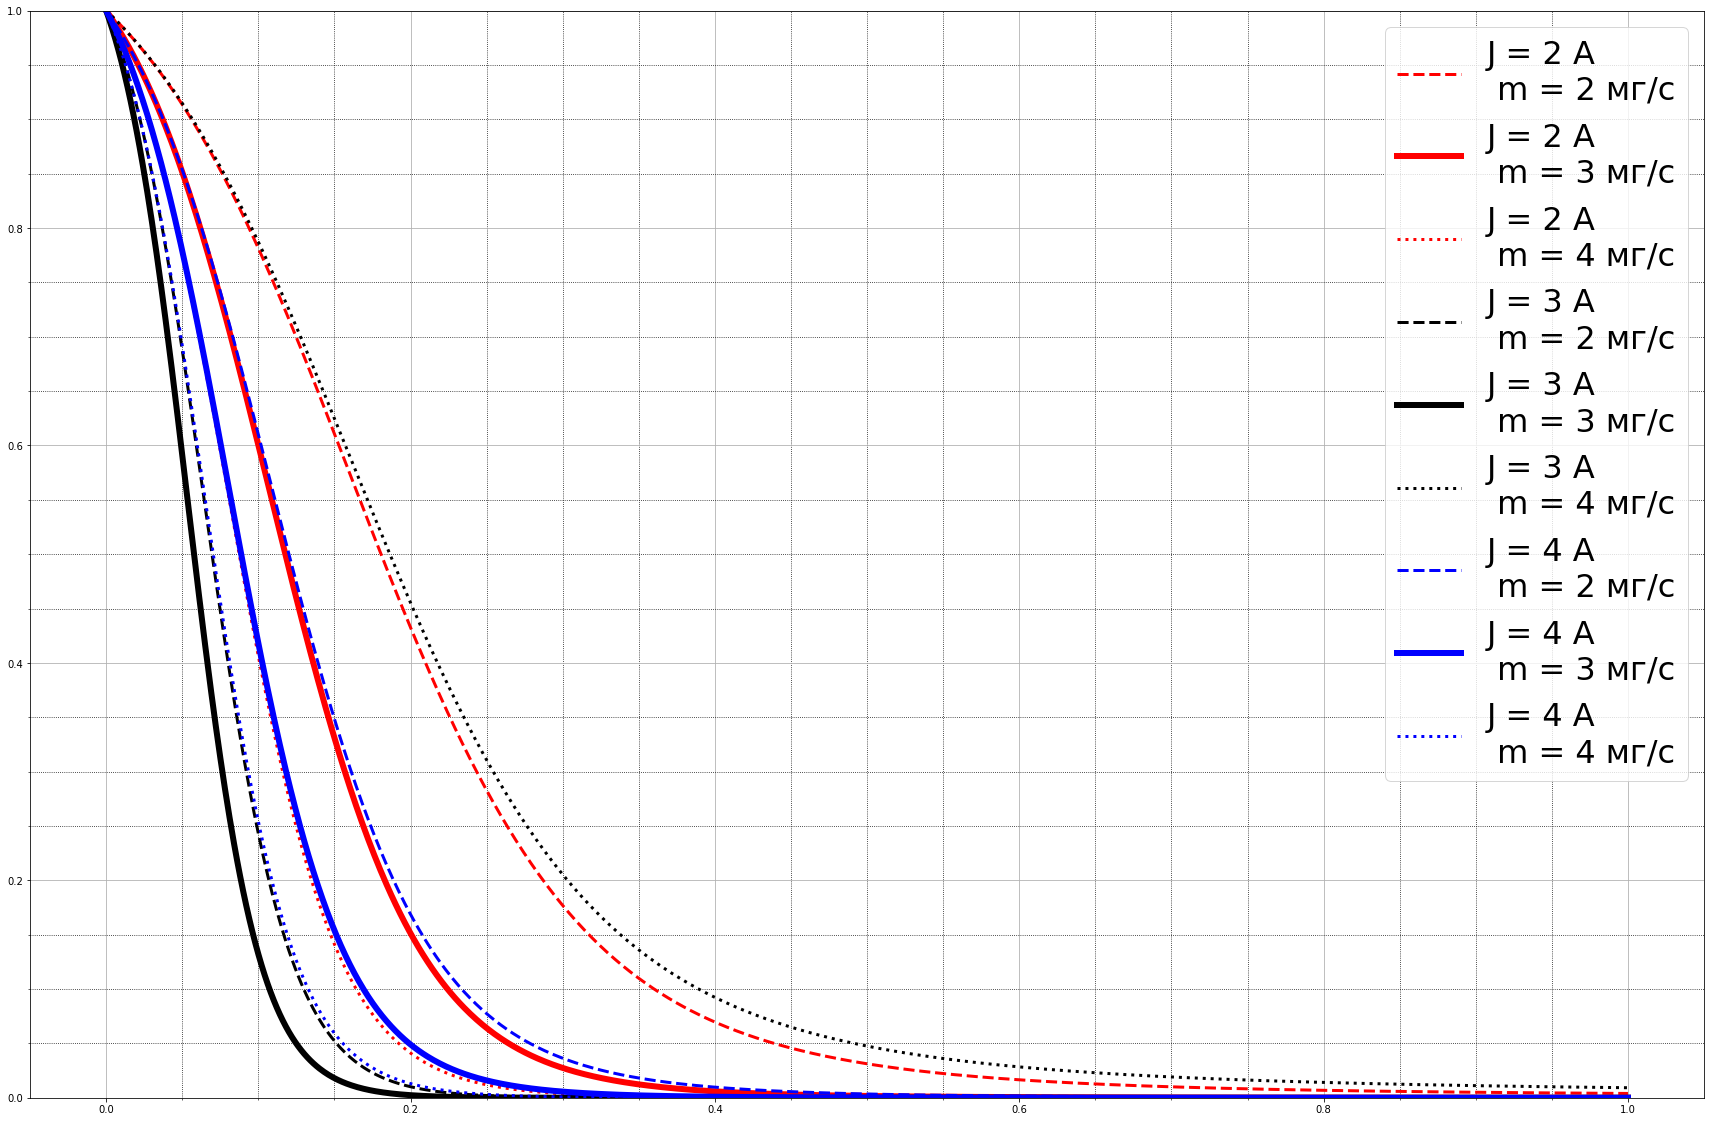

In [ ]:
plt.rcParams ['figure.figsize'] = [30, 20]



plt.ylim([0,1])

plt.minorticks_on()
plt.grid(True)
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

  


plt.plot(x,nax[0],color = "red", linestyle =  "--",linewidth = 3)
plt.plot(x,nax[1],label="n(x)", color = "red",linewidth = 6)
plt.plot(x,nax[2],label="n(x)", color = "red", linestyle =  ":",linewidth = 3)

plt.plot(x,nax[3], label="V(x)",color = "black", linestyle =  "--",linewidth = 3)
plt.plot(x,nax[4],label="n(x)", color = "black",linewidth = 6)
plt.plot(x,nax[5],label="n(x)", color = "black", linestyle =  ":",linewidth = 3)


plt.plot(x,nax[6], label="V(x)",color = "blue", linestyle =  "--",linewidth = 3)
plt.plot(x,nax[7],label="n(x)", color = "blue",linewidth = 6)
plt.plot(x,nax[8],label="n(x)", color = "blue", linestyle =  ":",linewidth = 3)
plt.legend(['J = 2 A \n m = 2 мг/c','J = 2 A \n m = 3 мг/c','J = 2 A \n m = 4 мг/c','J = 3 A \n m = 2 мг/c','J = 3 A \n m = 3 мг/c','J = 3 A \n m = 4 мг/c','J = 4 A \n m = 2 мг/c','J = 4 A \n m = 3 мг/c','J = 4 A \n m = 4 мг/c'],fontsize = 32)
    

